In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
#in this we are going to predict quality of wine 

In [5]:
pd.options.display.max_columns =None
pd.options.display.max_rows = None

In [81]:
df = pd.read_csv('winequality-red.csv',engine='python')

In [13]:
#Chraking top 5 rows and Shape of dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.shape

(1599, 12)

In [17]:
#Checking null values
df.isnull().sum()
#As we see there is no null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 1. Exploratory Data Analysis (EDA)

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Wine Quality Distribution')

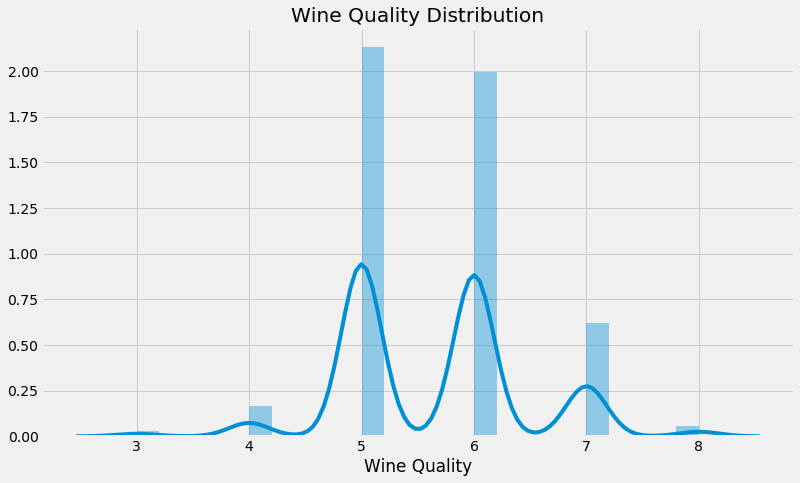

In [23]:
#Logarithimic distribution of the target variable : quality
#Appling log on quality
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df.quality , bins = 25)
plt.ticklabel_format(style='sci' ,axis='x', scilimits=(0,1))
plt.xlabel('Wine Quality')
plt.title("Wine Quality Distribution")

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


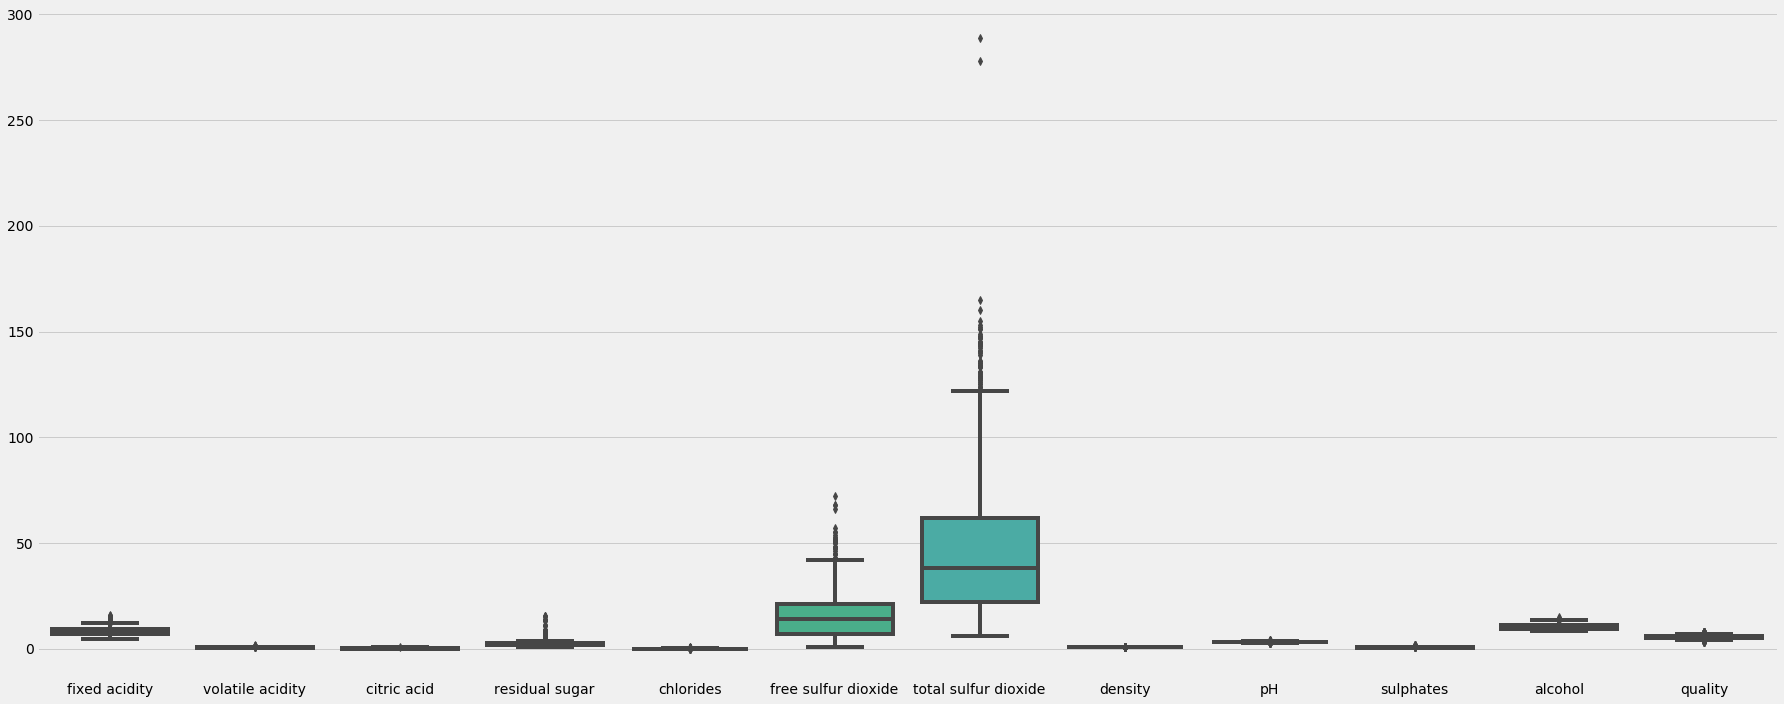

In [30]:
#fixed acidity.
sns.factorplot(data=df,kind='box',size=10,aspect=2.5) # the values are distributed over a very small scale.

In [31]:
#Numerical Predictors
#Let’s start by seeing which of our features are numeric.
numeric_features = df.select_dtypes(include=[np.number])

In [35]:
corr = numeric_features.corr() #Store Correlation values 
print(corr['quality'].sort_values(ascending=False)[:10], '\n') #Check top 10 +ve correlations
print(corr['quality'].sort_values(ascending=False)[-10:])#Check top 10 -ve correlations

quality                1.000000
alcohol                0.476166
sulphates              0.251397
citric acid            0.226373
fixed acidity          0.124052
residual sugar         0.013732
free sulfur dioxide   -0.050656
pH                    -0.057731
chlorides             -0.128907
density               -0.174919
Name: quality, dtype: float64 

sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


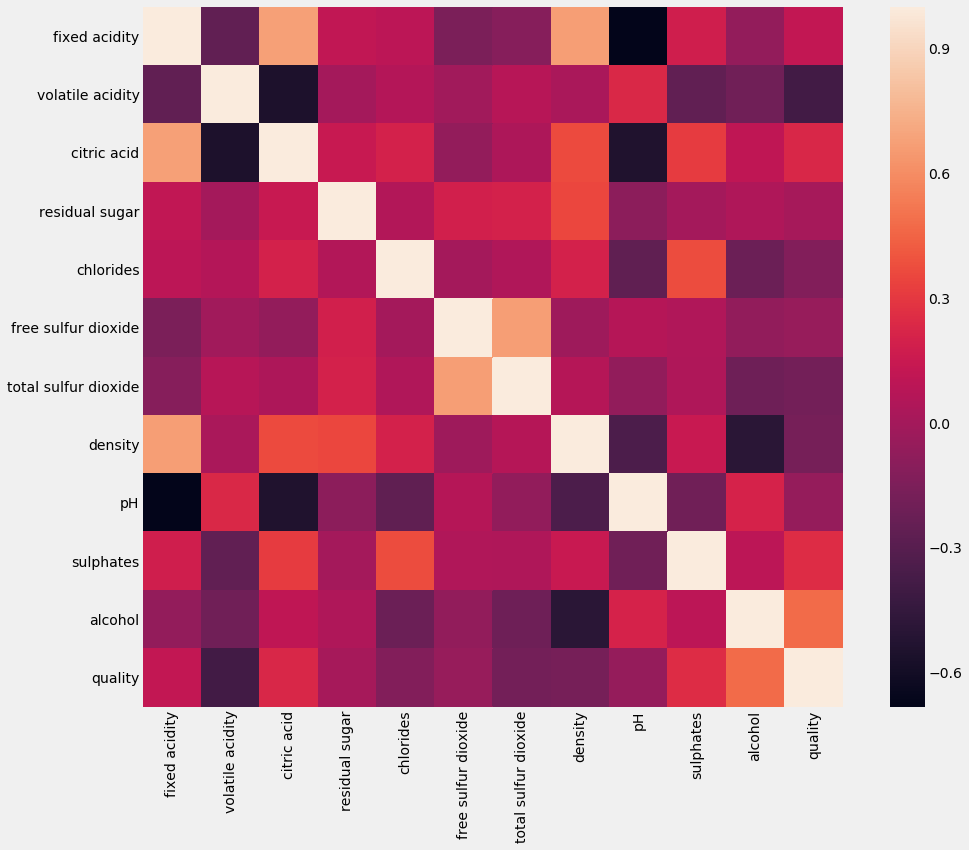

In [37]:
#correlation matrix
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, square=True)

In [38]:
s = corr.unstack()
s[(abs(s)>0.6) & (abs(s) < 1)]

fixed acidity         citric acid             0.671703
                      density                 0.668047
                      pH                     -0.682978
citric acid           fixed acidity           0.671703
free sulfur dioxide   total sulfur dioxide    0.667666
total sulfur dioxide  free sulfur dioxide     0.667666
density               fixed acidity           0.668047
pH                    fixed acidity          -0.682978
dtype: float64

# Distribution of the variable¶

In [40]:
#To check unique values in quality
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [42]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


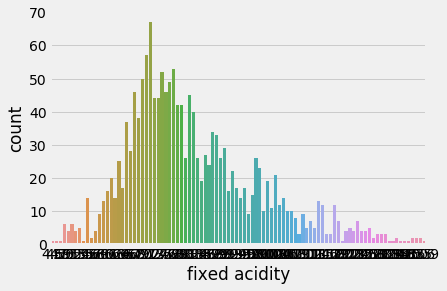

In [44]:
sns.countplot(df['fixed acidity'])

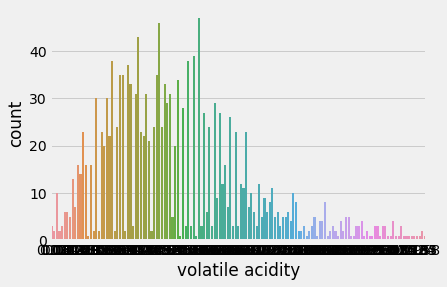

In [45]:
sns.countplot(df['volatile acidity'])

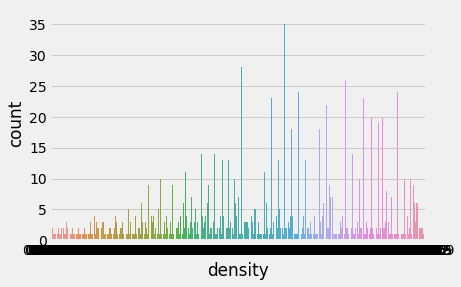

In [46]:
sns.countplot(df['density'])

In [50]:
#Biveriant 

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


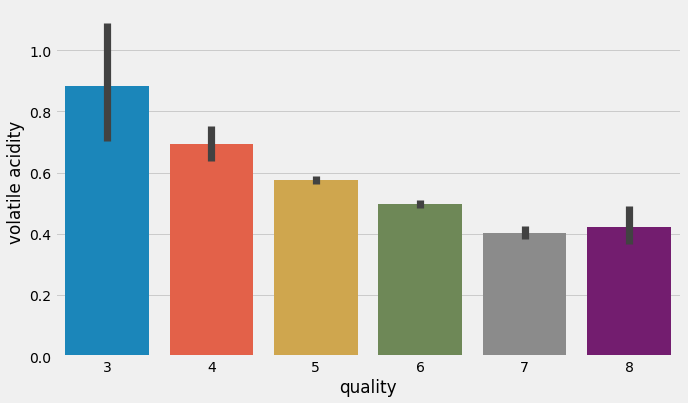

In [48]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

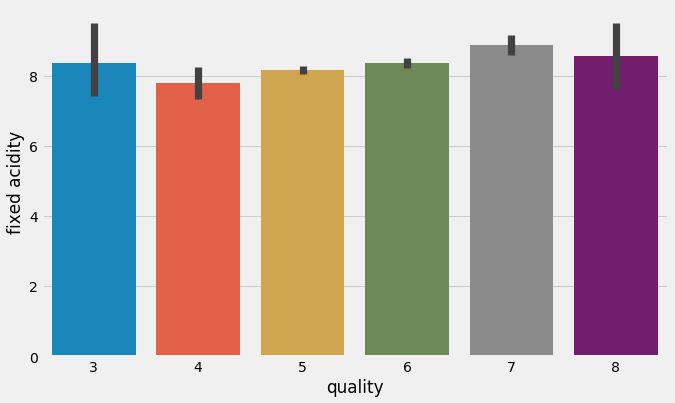

In [51]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

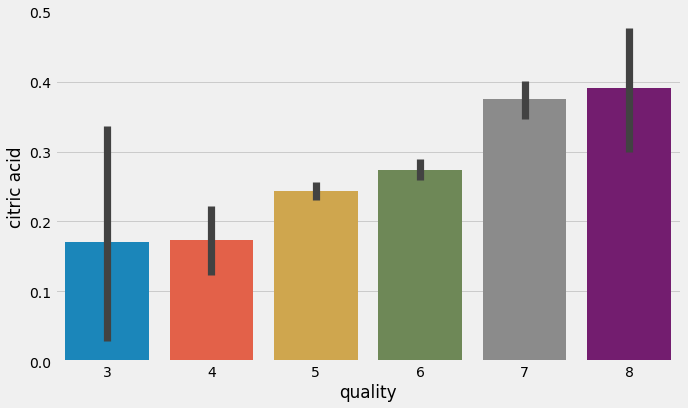

In [49]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

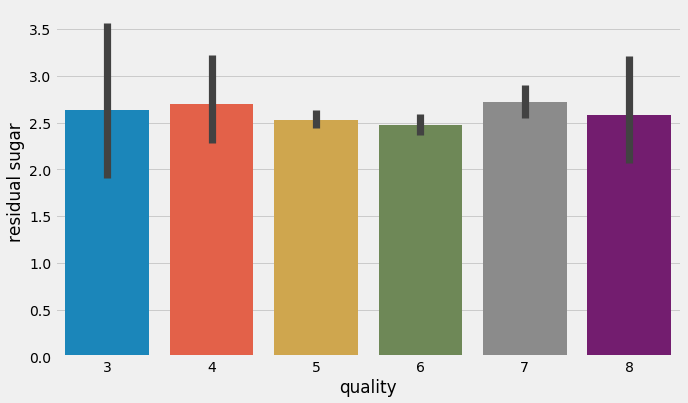

In [53]:
#Here aslo we dont; see any changes
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

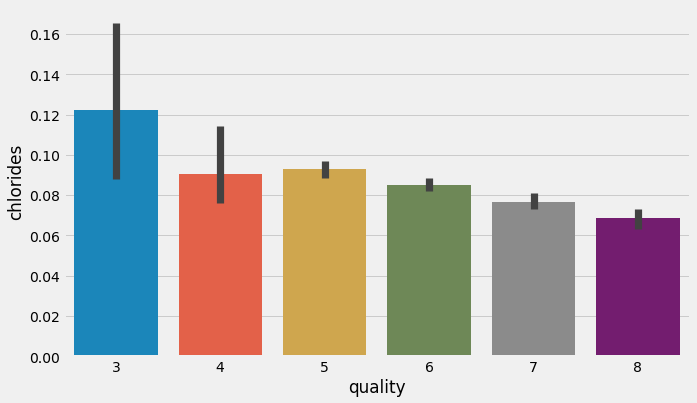

In [54]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

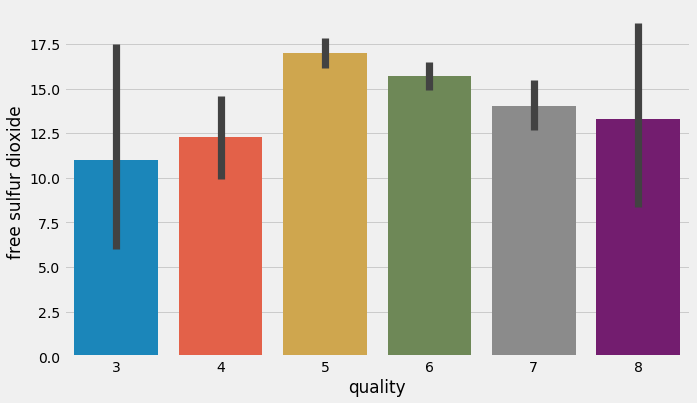

In [56]:
#Composition of free sulfur dioxide go higher in the middle quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)


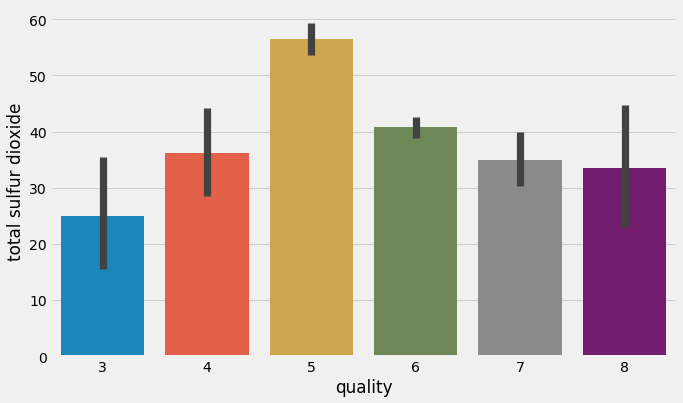

In [58]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

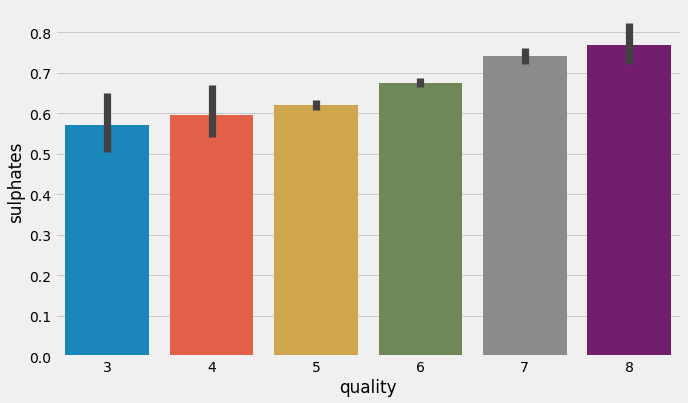

In [60]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

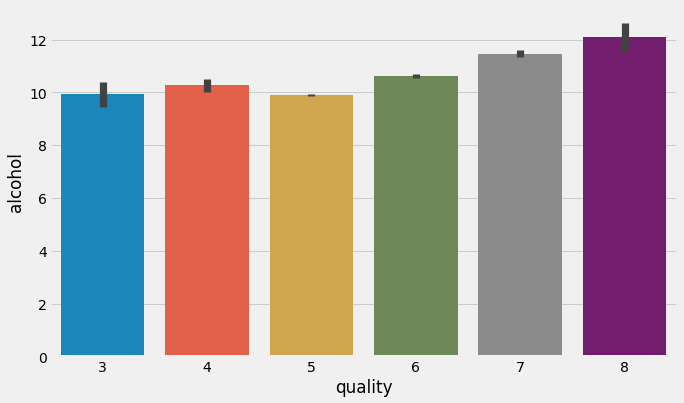

In [61]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)


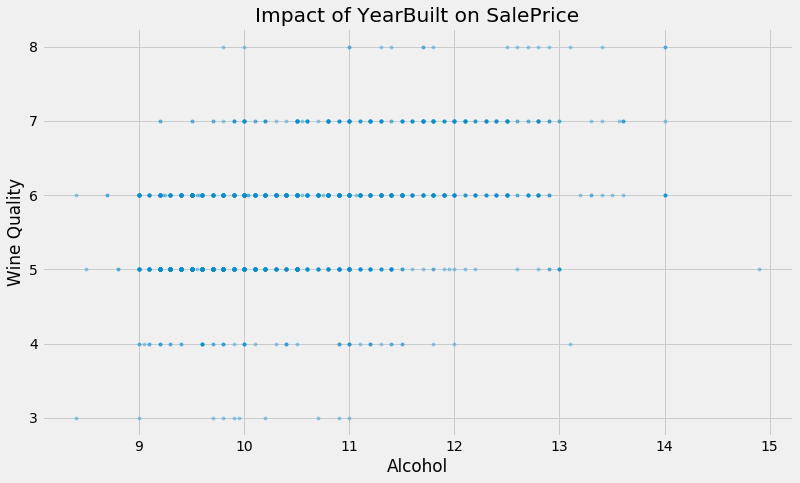

In [63]:
#YearBuilt vs SalePrice
plt.figure(figsize=(12,7))
plt.xlabel("Alcohol")
plt.ylabel("Wine Quality")
plt.title("Impact of YearBuilt on SalePrice")
plt.plot(df.alcohol, df.quality ,'.', alpha = 0.3)

# Data Pre-processing

In [67]:
# Log transform skewed numeric features
#Let’s check which features also have some skewness that can affect the results and log those values.
numeric_feats = df.dtypes[df.dtypes != 'object'].index
skewed_feats = df[numeric_feats].apply(lambda x: pd.DataFrame.skew(x)) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
df[skewed_feats] = np.log1p(df[skewed_feats])
df[skewed_feats]

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,2.128232,1.064711,0.073250,2.484907,3.555348,0.444686,2.341806
1,2.174752,1.280934,0.093490,3.258097,4.219508,0.518794,2.379546
2,2.174752,1.193922,0.088011,2.772589,4.007333,0.500775,2.379546
3,2.501436,1.064711,0.072321,2.890372,4.110874,0.457425,2.379546
4,2.128232,1.064711,0.073250,2.484907,3.555348,0.444686,2.341806
5,2.128232,1.029619,0.072321,2.639057,3.713572,0.444686,2.341806
6,2.186051,0.955511,0.066724,2.772589,4.094345,0.378436,2.341806
7,2.116256,0.788457,0.062975,2.772589,3.091042,0.385262,2.397895
8,2.174752,1.098612,0.070458,2.302585,2.944439,0.451076,2.351375
9,2.140066,1.960095,0.068593,2.890372,4.634729,0.587787,2.442347


In [82]:
y = df.quality
df.drop(['quality'],inplace=True , axis=1)
y

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
30      5
31      6
32      5
33      6
34      5
35      6
36      6
37      7
38      4
39      5
40      5
41      4
42      6
43      5
44      5
45      4
46      5
47      5
48      5
49      5
50      5
51      6
52      6
53      5
54      6
55      5
56      5
57      5
58      5
59      6
60      5
61      5
62      7
63      5
64      5
65      5
66      5
67      5
68      5
69      6
70      6
71      5
72      5
73      4
74      5
75      5
76      5
77      6
78      5
79      4
80      5
81      5
82      5
83      5
84      6
85      5
86      6
87      5
88      5
89      5
90      5
91      6
92      5
93      5
94      4
95      6
96      5
97      5
98      5
99      6


In [69]:
y = y.astype(int)

#y = y.values.ravel()

y = y.values.reshape(-1 )
y

array([5, 5, 5, ..., 6, 5, 6])

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df, y, test_size=0.3, random_state=10)

# Linear Regression

In [86]:
#Linear Regression
from sklearn import linear_model
modelLinearReg = linear_model.LogisticRegression()
modelLinearReg.fit(X_train,Y_train)
Y_pred_Liner = modelLinearReg.predict(X_test)
print(list(zip(Y_test,Y_pred_Liner)))

[(5, 6), (5, 5), (6, 5), (6, 6), (5, 5), (6, 7), (7, 6), (6, 6), (5, 5), (5, 5), (7, 6), (4, 5), (5, 5), (5, 5), (6, 5), (5, 5), (6, 6), (6, 6), (6, 5), (5, 5), (5, 5), (6, 6), (5, 6), (5, 6), (5, 5), (5, 6), (5, 6), (6, 5), (6, 6), (6, 5), (5, 5), (5, 5), (7, 6), (8, 6), (5, 6), (5, 5), (8, 6), (6, 5), (6, 6), (6, 5), (6, 6), (7, 6), (5, 5), (7, 6), (5, 5), (7, 6), (6, 5), (7, 6), (6, 6), (5, 5), (6, 6), (7, 6), (6, 6), (6, 6), (6, 6), (6, 6), (6, 6), (5, 5), (5, 6), (5, 5), (5, 6), (5, 5), (7, 6), (6, 6), (6, 6), (5, 5), (6, 5), (6, 6), (5, 5), (6, 6), (6, 6), (5, 5), (5, 6), (6, 5), (6, 6), (5, 5), (5, 6), (7, 6), (5, 6), (7, 6), (7, 6), (5, 5), (6, 6), (5, 5), (6, 6), (4, 6), (4, 6), (5, 5), (5, 6), (5, 5), (6, 6), (5, 6), (7, 6), (6, 6), (5, 5), (4, 6), (5, 5), (4, 5), (5, 6), (6, 6), (7, 6), (5, 5), (6, 5), (6, 6), (6, 6), (5, 6), (5, 5), (6, 6), (6, 6), (5, 6), (5, 5), (6, 6), (7, 5), (5, 5), (5, 5), (5, 5), (5, 5), (5, 5), (8, 6), (5, 6), (5, 5), (5, 5), (6, 6), (5, 5), (5, 6),

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [92]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [94]:
RMSE = sqrt(mean_squared_error(y_true=Y_test, y_pred=Y_pred_Liner))
print(RMSE)

0.752772652709081


In [101]:
modelLinearReg.score(X_train,Y_train)

0.5862377122430742

In [102]:
# Mean Square Error
#----------------------
import math

mse = np.mean((Y_pred_Liner - Y_test)**2)
print("mse = ", mse)

# Root Mean square
#---------------------
RMSE = math.sqrt(mse)
print("RMSE = ", RMSE)

mse =  0.5666666666666667
RMSE =  0.752772652709081


In [95]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier()

#fit the model on the data and predict the values

model_DecisionTree.fit(X_train, Y_train)
Y_pred = model_DecisionTree.predict(X_test)

#print(Y_pred) 
print("-------------------------------------------------------------------------------------")
print(list(zip(Y_test, Y_pred)))

-------------------------------------------------------------------------------------
[(5, 5), (5, 5), (6, 7), (6, 6), (5, 5), (6, 6), (7, 6), (6, 6), (5, 6), (5, 5), (7, 7), (4, 5), (5, 5), (5, 5), (6, 6), (5, 4), (6, 7), (6, 6), (6, 6), (5, 6), (5, 5), (6, 7), (5, 5), (5, 5), (5, 5), (5, 6), (5, 5), (6, 6), (6, 5), (6, 5), (5, 5), (5, 5), (7, 5), (8, 7), (5, 5), (5, 5), (8, 7), (6, 6), (6, 6), (6, 6), (6, 6), (7, 7), (5, 5), (7, 6), (5, 5), (7, 6), (6, 6), (7, 7), (6, 6), (5, 5), (6, 5), (7, 7), (6, 6), (6, 5), (6, 5), (6, 5), (6, 6), (5, 5), (5, 5), (5, 6), (5, 6), (5, 5), (7, 6), (6, 5), (6, 5), (5, 5), (6, 6), (6, 6), (5, 6), (6, 7), (6, 6), (5, 5), (5, 5), (6, 6), (6, 7), (5, 5), (5, 5), (7, 7), (5, 5), (7, 6), (7, 7), (5, 5), (6, 5), (5, 5), (6, 6), (4, 6), (4, 6), (5, 6), (5, 5), (5, 5), (6, 7), (5, 7), (7, 7), (6, 6), (5, 5), (4, 6), (5, 5), (4, 6), (5, 6), (6, 6), (7, 7), (5, 5), (6, 6), (6, 6), (6, 7), (5, 6), (5, 5), (6, 6), (6, 6), (5, 6), (5, 5), (6, 6), (7, 7), (5, 6), (

In [96]:
RMSE = sqrt(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
print(RMSE)

0.7759402897989853
